До цього ми розглядали **лінійні** структури даних (стек, черга, зв'язний список, геш-таблиця тощо). Під **лінійністю** тут перш за все мається на увазі відсутність якогось іншого зв'язку елементів між собою, окрім, можливо, порядку. Але ми постійно зустрічаємось з задачами, де присутній **ієрархічний** зв'язок між даними.

Візуалізація родового **дерева**, робота з HTML, файлова система, прийняття рішень, компіляція коду. Це все приклади задач, що вимагають роботи саме з ієрархією об'єктів. І для цього нам потрібні так звані **дерева**.

Давайте візуалізуємо приклад дерева за допомогою бібліотек networkx і graphviz.

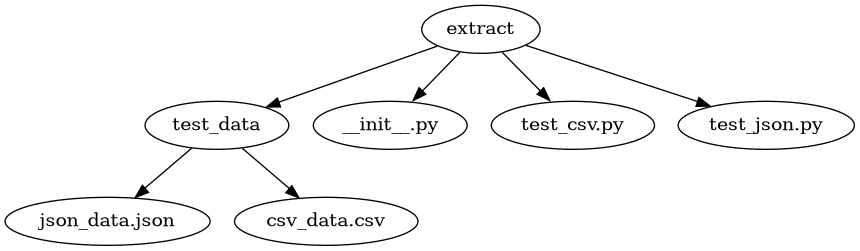

In [6]:
import os

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from graphviz import Digraph

from IPython.display import Image, display

def create_filesystem_tree(root_path):
    fs_tree = nx.DiGraph()
    fs_tree.add_node(root_path)
    for root, dirs, files in os.walk(root_path):
        for dir in dirs:
            fs_tree.add_node(os.path.join(root, dir))
            fs_tree.add_edge(root, os.path.join(root, dir))
        for file in files:
            fs_tree.add_node(os.path.join(root, file))
            fs_tree.add_edge(root, os.path.join(root, file))
    return fs_tree

PATH = "/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract"

fs_tree = create_filesystem_tree(PATH)
pos = graphviz_layout(fs_tree, prog='dot')
dot = Digraph()
for node in fs_tree.nodes:
    dot.node(node, node.split('/')[-1])
for edge in fs_tree.edges:
    dot.edge(edge[0], edge[1])
dot.format = 'png'
display(Image(dot.render()))

Будь яке дерево складається з наступних компонент:

* Вузол, або нода (node) - будь який з елементів дерева. В нашому випадку або директорія, або файл
* Корінь (root) - елемент, що знаходиться на початку (директорія extract)
* Гілка (edge) - зв'язок між нодою. В нашому випадку, якщо директорія знаходиться в іншій директорії, між ними є гілка на дереві.
* Рівень (level) - мінімальне число кроків, котре треба зробити від корня до якоїсь ноди. В нашому випадку в нас є 4 ноди I рівня і 2 ноди II рівня.
* Лист (leaf) - нода, у котрої немає зв'язків **на рівень нижче**. Кожен файл у нашому прикладі - лист.

З деревами зручно працювати використовуючи Linked List-like структуру даних:

In [90]:
from typing import Self, List, Any

class Node:
    def __init__(self, value: Any):
        self.value: Any = value
        self.children: List[Self] = list()

    def add_child(self, child):
        self.children.append(child)

    def __repr__(self):
        return f"Node({self.value})"

class Tree:
    """Саморобна імплементація дерева (зустрічається частіше, ніж здається, повірте)"""
    def __init__(self, root: Node) -> None:
        self.root: Node = root


In [103]:
BASE_PATH = "/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract"

root = Node(BASE_PATH)
test_data_dir = Node(f"{BASE_PATH}/test_data")
root.add_child(test_data_dir)
test_data_dir.add_child(Node(f"{BASE_PATH}/test_data/csv_data.csv"))
test_data_dir.add_child(Node(f"{BASE_PATH}/test_data/json_data.json"))
root.add_child(Node(f"{BASE_PATH}/__init__.py"))
root.add_child(Node(f"{BASE_PATH}/test_csv.py"))
root.add_child(Node(f"{BASE_PATH}/test_json.py"))


custom_fs_tree = Tree(root)

Головна різниця дерев від лінійних структур даних - це те, що доступ до елементів цієї структури даних може бути різним. Для дерев є два класичних варіанта обходу:

* Breadth-first search (обхід у ширину)
* Depth-first search (обхід у глибину)

Різниця чітко описується назвою. DFS зосереджений на тому, щоб швидше дійти до нод з найбільшим рівнем. BFS проходить рівень за рівнем.

Цікаво, що імплементації DFS і BFS дуже схожі. Відрізняються лише структури даних, котрі використовують ці алгоритми (BFS використовує чергу, DFS - стек)

In [104]:
from queue import Queue
# Також може бути використана структура даних deque з модуля collections

def breadth_first_search(tree, start_node):
    visited = set()
    queue = Queue()
    queue.put(start_node)
    visited.add(start_node)
    while not queue.empty():
        node = queue.get()
        print(node)
        for neighbor in tree.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.put(neighbor)

In [105]:
breadth_first_search(fs_tree, PATH)

/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/__init__.py
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_csv.py
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_json.py
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/json_data.json
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/csv_data.csv


In [106]:
from queue import Queue
# Також може бути використана структура даних deque з модуля collections

def breadth_first_search_custom(tree):
    visited = set()
    queue = Queue()
    root = tree.root
    queue.put(root)
    visited.add(root)
    while not queue.empty():
        node = queue.get()
        print(node)
        for child in node.children:
            if child not in visited:
                visited.add(child)
                queue.put(child)

In [107]:
breadth_first_search_custom(custom_fs_tree)

Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/__init__.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_csv.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_json.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/csv_data.csv)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/json_data.json)


In [108]:
# Також може бути використана структура даних deque з модуля collections


def depth_first_search(tree, start_node):
    visited = set()
    stack = [start_node]
    visited.add(start_node)
    while stack:
        node = stack.pop()
        print(node)
        for neighbor in tree.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append(neighbor)

In [109]:
depth_first_search(fs_tree, PATH)

/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_json.py
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_csv.py
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/__init__.py
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/csv_data.csv
/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/json_data.json


In [110]:
# Також може бути використана структура даних deque з модуля collections

def depth_first_search_custom(tree):
    visited = set()
    root = tree.root
    stack = [root]
    visited.add(root)
    while stack:
        node = stack.pop()
        print(node)
        for child in node.children:
            if child not in visited:
                visited.add(child)
                stack.append(child)

In [111]:
depth_first_search_custom(custom_fs_tree)

Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_json.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_csv.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/__init__.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/json_data.json)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/csv_data.csv)


Існує багато видів дерев. Особлвивий інтерес представляють бінарні дерева. Бінарним є дерево, в котрого для кожної батьківської ноди є максимум 2 дочірніх.

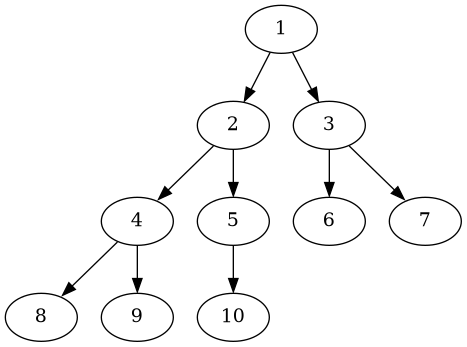

In [112]:
import networkx as nx

bin_tree=nx.DiGraph()
bin_tree.add_edges_from([(1,2), (1,3), (2,4), (2,5), (3,6), (3,7),
                 (4,8), (4,9), (5,10)])
picture=nx.drawing.nx_agraph.to_agraph(bin_tree)
picture.layout('dot')
picture.draw('bintree.png')
Image('bintree.png')

In [113]:
breadth_first_search(bin_tree, 1)

1
2
3
4
5
6
7
8
9
10


In [114]:
depth_first_search(bin_tree, 1)

1
3
7
6
2
5
10
4
9
8


In [116]:
from typing import Self, Any

class NodeBinary:
    def __init__(self, value: Any, left: Self, right: Self) -> None:
        self.value: Any = value
        self.left: Self = left
        self.right: Self = right

    def __repr__(self) -> str:
        return f"Node({self.value})"

class BinaryTree:
    def __init__(self, root: NodeBinary) -> None:
        self.root: NodeBinary = root


Існує багато видів бінарних дерев. Особливий інтерес для нас представляє бінарне дерево пошуку.

Для того, щоб бінарне дерево було бінарним деревом пошуку, воно має задовільняти умові бінарного дерева пошуку. Воно має бути структуровано таким чином, щоб для кожної ноди зліва були тільки елементи менше від неї, а справа - тільки ті, що більше.

Будь який відсортований список може бути перетворений у BST. 

Загалом, це доволі глибока ідея: дерева можуть допомогти встановити ієрархічні зв'язки навіть між даними, чия структура здається пласкою